# Compressing node data


In [84]:
new_representation = pd.DataFrame()

## RNAtango torsion angles

/tmp/nix-shell.0h3BYt/ipykernel_123143/118620058.py:18: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  torsions[torsions.columns[4:]]=torsions[torsions.columns[4:]].replace('-',np.nan).interpolate(method='polynomial',order=2, limit_direction='both').fillna(method='ffill').fillna(method='bfill')
/tmp/nix-shell.0h3BYt/ipykernel_123143/118620058.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  torsions[torsions.columns[4:]]=torsions[torsions.columns[4:]].replace('-',np.nan).interpolate(method='polynomial',order=2, limit_direction='both').fillna(method='ffill').fillna(method='bfill')


,Chain,ResNum,iCode,Name,bb.alpha,bb.beta,bb.gamma,bb.delta,bb.epsilon,bb.zeta,rb.nu0,rb.nu1,rb.nu2,rb.nu3,rb.nu4,pt.eta,pt.theta,pt.eta-prim,pt.theta-prim,b.chi
0,A,1,-,G,115.000,170.929,49.335,88.416,-149.712,-71.989,12.611,-31.601,37.568,-31.362,11.937,173.909,-137.842,-174.100,-137.563,-176.334
1,A,2,-,G,-56.581,-177.470,43.012,84.422,-148.866,-66.602,4.275,-26.138,36.818,-35.434,19.663,173.909,-138.068,-174.100,-135.346,-161.751
2,A,3,-,C,-60.266,-175.710,36.785,82.829,-157.212,-70.658,2.848,-25.664,37.463,-36.904,21.465,163.354,-153.538,177.744,-151.732,-152.279
3,A,4,-,G,-84.799,158.156,88.413,79.481,-149.820,-67.059,-4.360,-20.725,36.481,-39.987,27.863,171.342,-142.571,-173.220,-145.882,-175.734
4,A,5,-,C,-72.834,176.133,61.798,78.747,-155.630,-86.063,-3.870,-21.772,37.651,-40.844,28.108,167.250,-167.732,-175.880,-166.761,-168.883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,A,62,-,C,-55.285,166.502,55.220,83.857,-149.360,88.505,-6.925,-16.000,31.412,-36.332,27.213,175.649,28.292,-170.364,-24.076,-148.638
62,A,63,-,U,133.544,162.554,51.958,93.032,44.663,124.097,12.581,-27.699,31.477,-25.283,8.143,61.856,-138.133,120.981,-160.977,176.350
63,A,64,-,C,158.618,162.055,51.824,82.881,-162.310,-73.708,-2.594,-20.500,34.394,-36.909,24.878,104.303,-115.551,124.333,-121.133,-134.750
64,A,65,-,C,135.309,-139.071,-177.501,86.466,11.783,173.824,8.673,-29.264,37.524,-33.593,15.772,-141.286,-62.980,-134.920,-119.475,-168.784


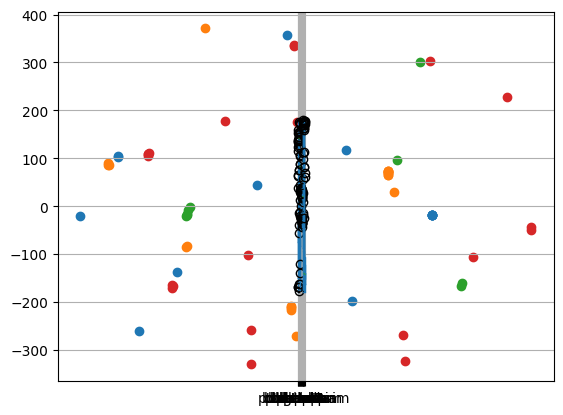

In [170]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

# based on https://academic.oup.com/view-large/38265613

torsion_default = {
    "alpha": 115.00,
    "epsilon": 30.0,
    "zeta": 107.0,
}
interpolation_method = "polynomial"
torsions = pd.read_csv(
    "../data/rnaquadataset/preprocessing/features/1B23_1_R_1/1B23_1_R_1_all.tor", delimiter="\t", index_col=False
)
torsions["bb.alpha"] = torsions["bb.alpha"].replace("-", torsion_default["alpha"])
torsions["bb.epsilon"] = torsions["bb.epsilon"].replace("-", torsion_default["epsilon"])
torsions["bb.zeta"] = torsions["bb.zeta"].replace("-", torsion_default["zeta"])
torsions[torsions.columns[4:]] = (
    torsions[torsions.columns[4:]]
    .replace("-", np.nan)
    .interpolate(method="polynomial", order=2, limit_direction="both")
    .fillna(method="ffill")
    .fillna(method="bfill")
)
# display(torsions)
torsions[torsions.columns[4:]] = torsions[torsions.columns[4:]].astype(float)
display(torsions)
torsions.boxplot(
    figsize=(15, 5),
    column=[
        "bb.alpha",
        "bb.beta",
        "bb.gamma",
        "bb.delta",
        "bb.epsilon",
        "bb.zeta",
        "rb.nu0",
        "rb.nu1",
        "rb.nu2",
        "rb.nu3",
        "rb.nu4",
        "pt.eta",
        "pt.theta",
        "pt.eta-prim",
        "pt.theta-prim",
        "b.chi",
    ],
)
plt.show()

## All torsion

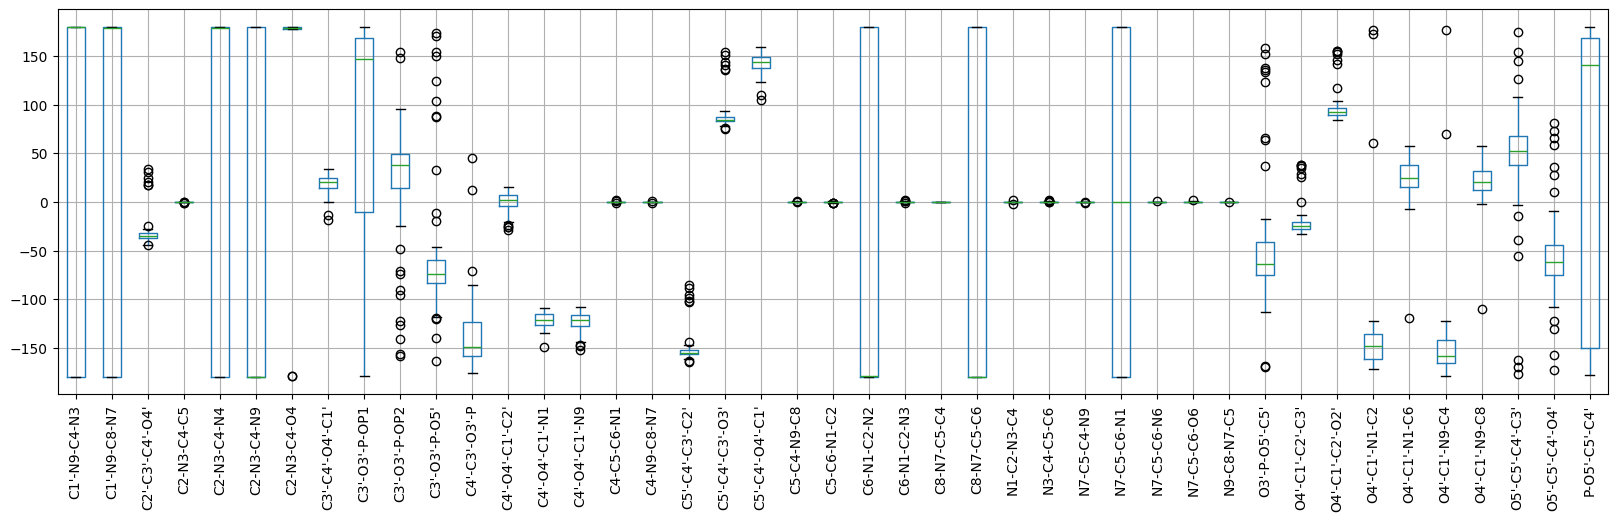

In [171]:
pd.options.display.max_columns = None
alltor = pd.read_csv("../data/rnaquadataset/preprocessing/features/1B23_1_R_1/1B23_1_R_1.atr", delimiter="\t", index_col=False)
alltor = alltor[alltor.columns[4:]].replace("-", np.nan).astype(float)
alltor.fillna(alltor.mean())

alltor[alltor.columns[4:]].boxplot(
    figsize=(20, 5),
)
plt.xticks(rotation=90)
plt.show()

In [172]:
oldtor = pd.read_csv("../data/rnaquadataset/preprocessing/features/1B23_1_R_1/1B23_1_R_1.atr", delimiter="\t", index_col=False)
g = oldtor[oldtor.Name == "G"][oldtor.columns[4:]]
a = oldtor[oldtor.Name == "A"][oldtor.columns[4:]]
c = oldtor[oldtor.Name == "C"][oldtor.columns[4:]]
u = oldtor[oldtor.Name == "U"][oldtor.columns[4:]]
common_columns = set(oldtor.columns[4:])

/tmp/nix-shell.0h3BYt/ipykernel_123143/340465827.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  u=u[ucol].replace('-',np.nan).astype(float).interpolate(method='polynomial',order=2, limit_direction='both').fillna(method='ffill').fillna(method='bfill')
/tmp/nix-shell.0h3BYt/ipykernel_123143/340465827.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  c=c[ccol].replace('-',np.nan).astype(float).interpolate(method='polynomial',order=2, limit_direction='both').fillna(method='ffill').fillna(method='bfill')
/tmp/nix-shell.0h3BYt/ipykernel_123143/340465827.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  a=a[acol].replace('-',np.nan).astype(float).interpolate(method='polynomial',order=2, limit_direction='both')

'Individual angles G'

<Axes: >

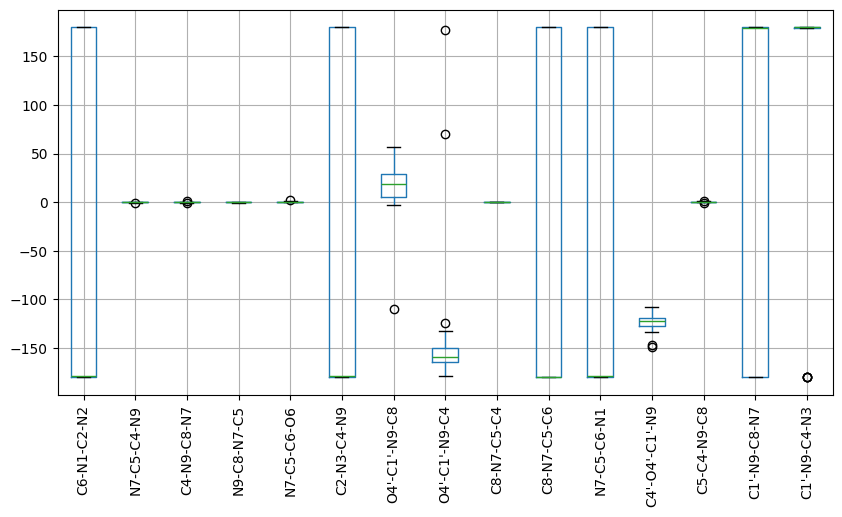

'Individual angles A'

<Axes: >

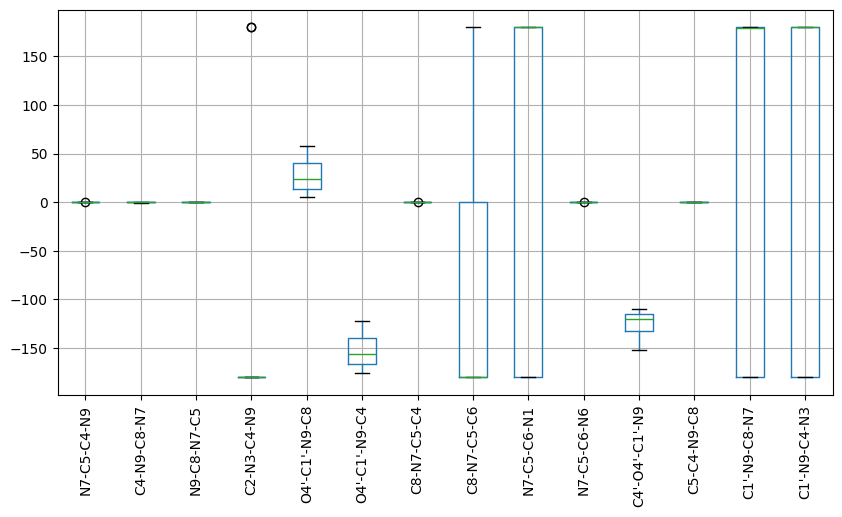

'Individual angles C'

<Axes: >

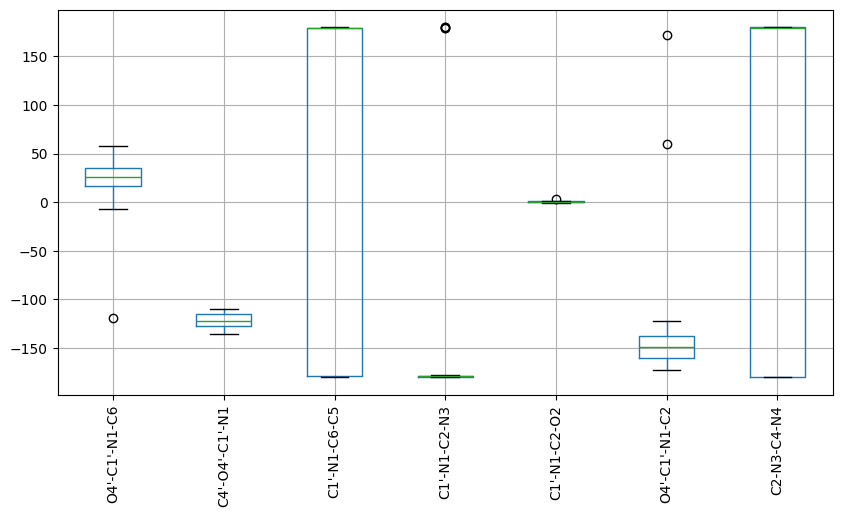

'Individual angles U'

<Axes: >

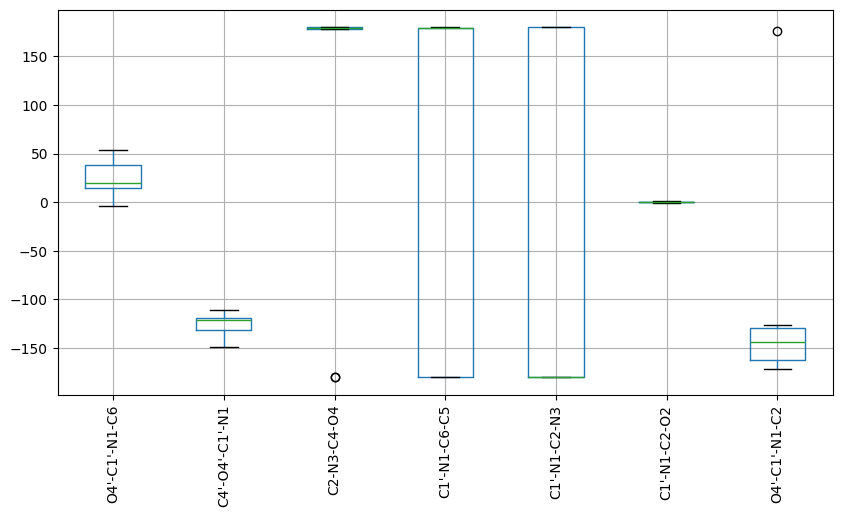

'PCA individuals'

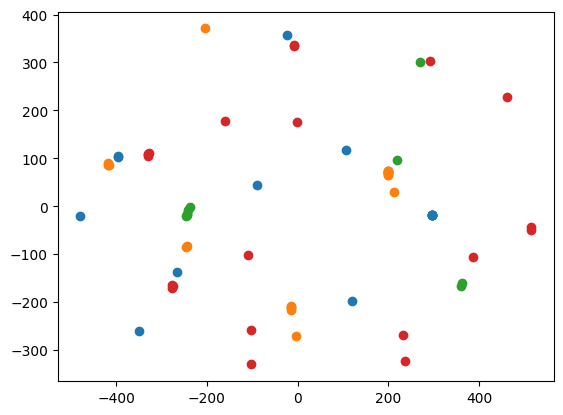

In [173]:
temp = []
for col in g.columns:
    if any(g[1:-2][col].isin(["-"])):
        temp.append(col)
gcol = list(set(g.columns) - set(temp))
common_columns -= set(temp)

temp = []
for col in a.columns:
    if any(a[1:-2][col].isin(["-"])):
        temp.append(col)
acol = list(set(a.columns) - set(temp))
common_columns -= set(temp)

temp = []
for col in c.columns:
    if any(c[1:-2][col].isin(["-"])):
        temp.append(col)
ccol = list(set(c.columns) - set(temp))
common_columns -= set(temp)

temp = []
for col in u.columns:
    if any(u[1:-2][col].isin(["-"])):
        temp.append(col)
ucol = list(set(u.columns) - set(temp))
common_columns -= set(temp)

u = (
    u[ucol]
    .replace("-", np.nan)
    .astype(float)
    .interpolate(method="polynomial", order=2, limit_direction="both")
    .fillna(method="ffill")
    .fillna(method="bfill")
)
c = (
    c[ccol]
    .replace("-", np.nan)
    .astype(float)
    .interpolate(method="polynomial", order=2, limit_direction="both")
    .fillna(method="ffill")
    .fillna(method="bfill")
)
a = (
    a[acol]
    .replace("-", np.nan)
    .astype(float)
    .interpolate(method="polynomial", order=2, limit_direction="both")
    .fillna(method="ffill")
    .fillna(method="bfill")
)
g = (
    g[gcol]
    .replace("-", np.nan)
    .astype(float)
    .interpolate(method="polynomial", order=2, limit_direction="both")
    .fillna(method="ffill")
    .fillna(method="bfill")
)
display("Individual angles G")
display(g.boxplot(figsize=(10, 5), column=list(set(gcol) - common_columns)))
plt.xticks(rotation=90)
plt.show()
display("Individual angles A")
display(a.boxplot(figsize=(10, 5), column=list(set(acol) - common_columns)))
plt.xticks(rotation=90)
plt.show()
display("Individual angles C")
display(c.boxplot(figsize=(10, 5), column=list(set(ccol) - common_columns)))
plt.xticks(rotation=90)
plt.show()
display("Individual angles U")
display(u.boxplot(figsize=(10, 5), column=list(set(ucol) - common_columns)))
plt.xticks(rotation=90)
plt.show()

from sklearn.decomposition import PCA

display("PCA individuals")
pca = PCA(n_components=7)
a_components_tor = pd.DataFrame(pca.fit_transform(a[list(set(acol) - common_columns)])).set_index(a.index)
c_components_tor = pd.DataFrame(pca.fit_transform(c[list(set(ccol) - common_columns)])).set_index(c.index)
u_components_tor = pd.DataFrame(pca.fit_transform(u[list(set(ucol) - common_columns)])).set_index(u.index)
g_components_tor = pd.DataFrame(pca.fit_transform(g[list(set(gcol) - common_columns)])).set_index(g.index)

plt.scatter(a_components_tor[0], a_components_tor[1])
plt.scatter(c_components_tor[0], c_components_tor[1])
plt.scatter(u_components_tor[0], u_components_tor[1])
plt.scatter(g_components_tor[0], g_components_tor[1])


g_tor = pd.concat([g[list(common_columns)], g_components_tor.add_suffix("_pca_tor")], axis=1)
a_tor = pd.concat([a[list(common_columns)], a_components_tor.add_suffix("_pca_tor")], axis=1)
u_tor = pd.concat([u[list(common_columns)], u_components_tor.add_suffix("_pca_tor")], axis=1)
c_tor = pd.concat([c[list(common_columns)], c_components_tor.add_suffix("_pca_tor")], axis=1)

plt.show()

### Common

<Axes: >

'Common angles G'

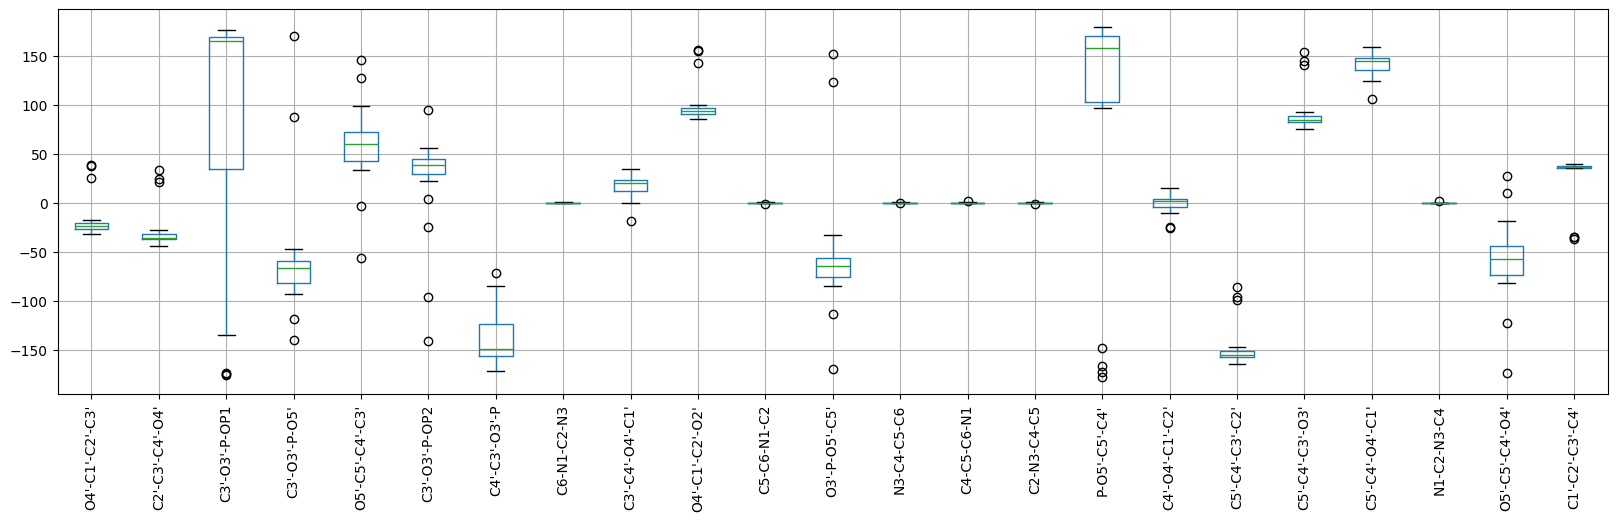

<Axes: >

'Common angles A'

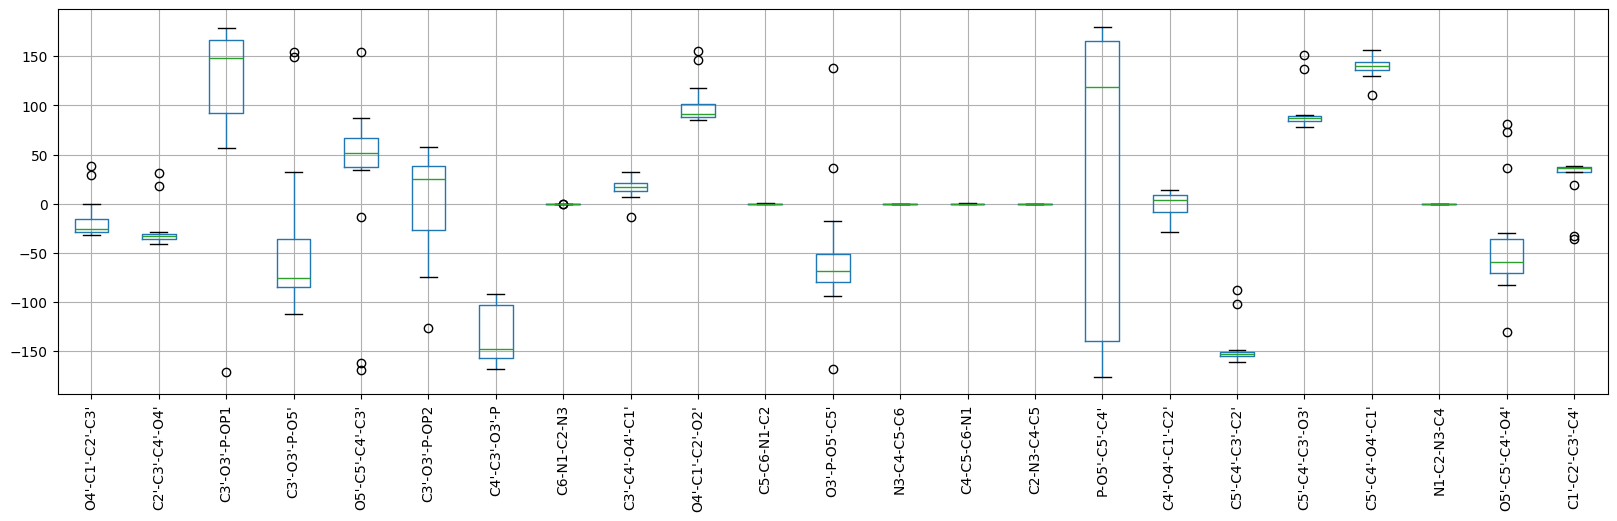

<Axes: >

'Common angles C'

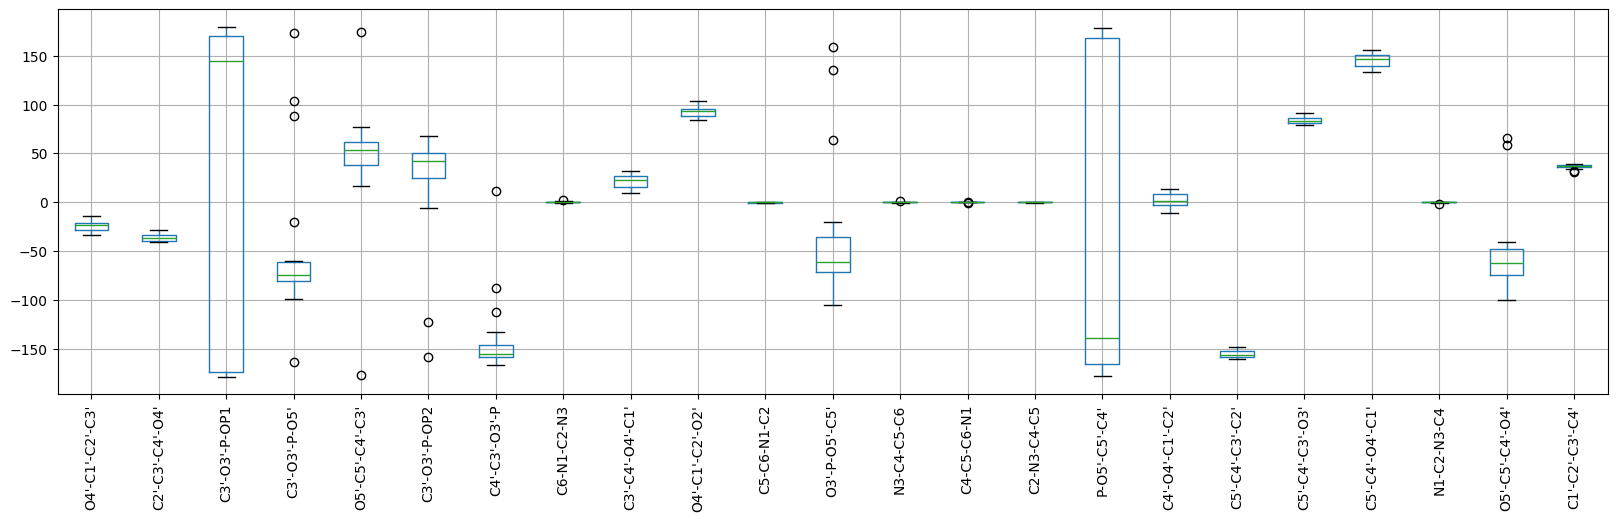

<Axes: >

'Common angles U'

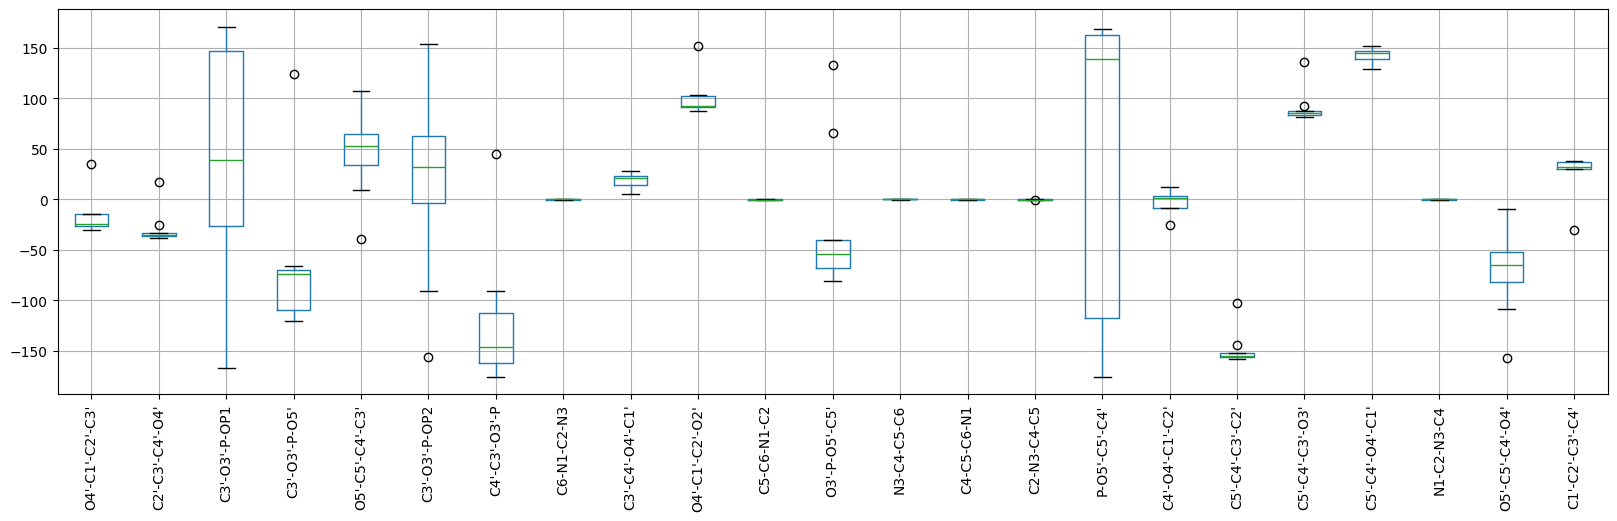

In [174]:
display(g[list(common_columns)].boxplot(figsize=(20, 5)))
plt.xticks(rotation=90)
display("Common angles G")
plt.show()
display(a[list(common_columns)].boxplot(figsize=(20, 5)))
plt.xticks(rotation=90)
display("Common angles A")
plt.show()
display(c[list(common_columns)].boxplot(figsize=(20, 5)))
plt.xticks(rotation=90)
display("Common angles C")
plt.show()
display(u[list(common_columns)].boxplot(figsize=(20, 5)))
plt.xticks(rotation=90)
display("Common angles U")
plt.show()

## All bonds angle

25

<Axes: >

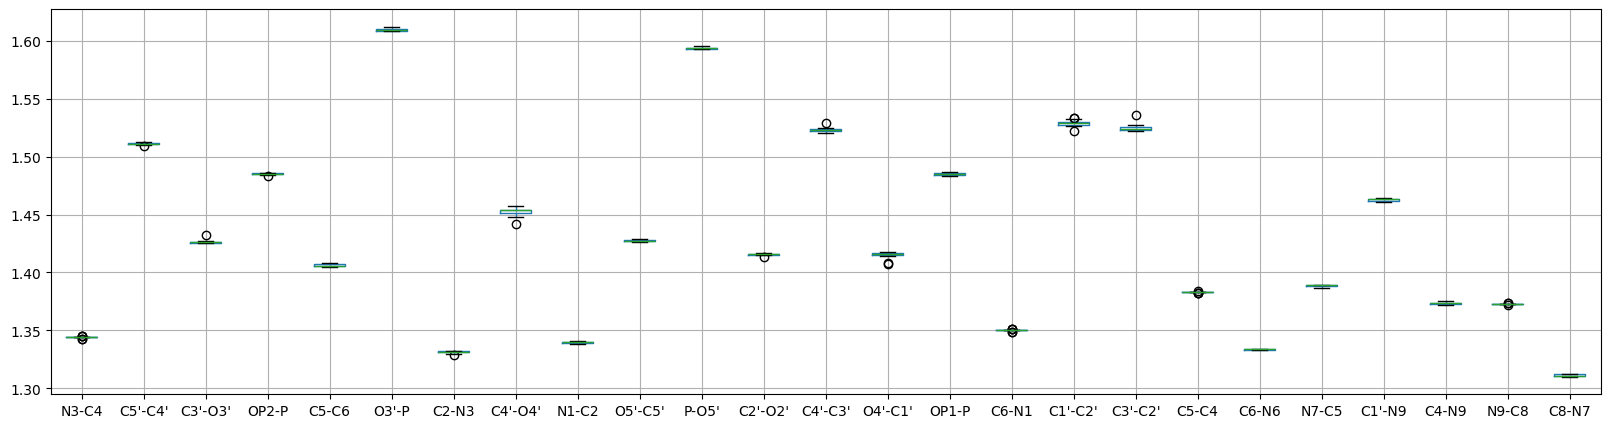

22

<Axes: >

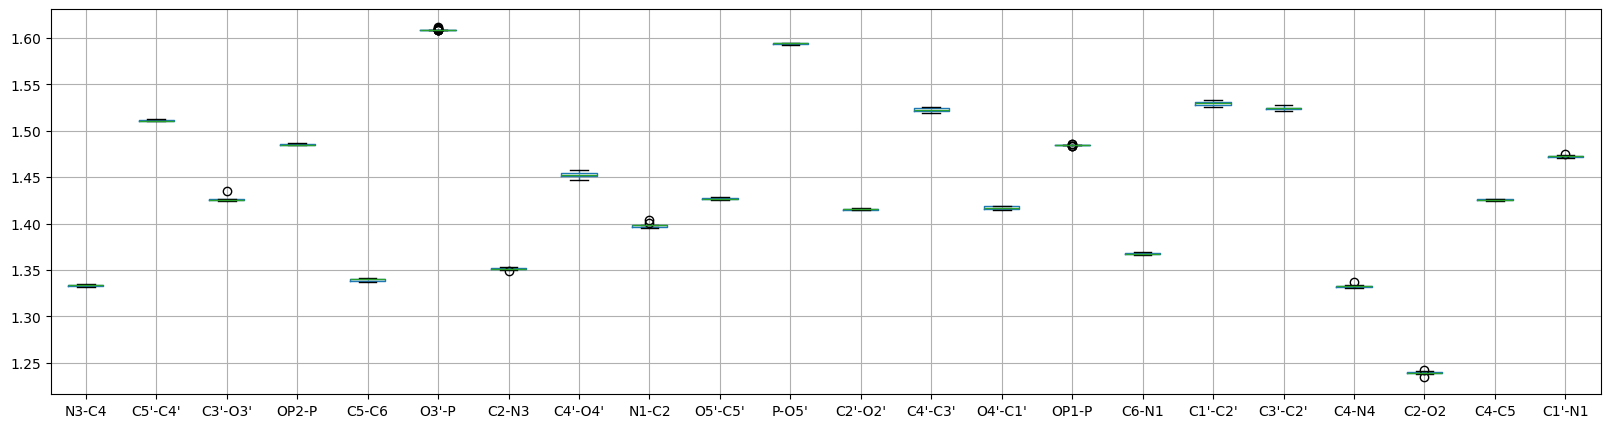

22

<Axes: >

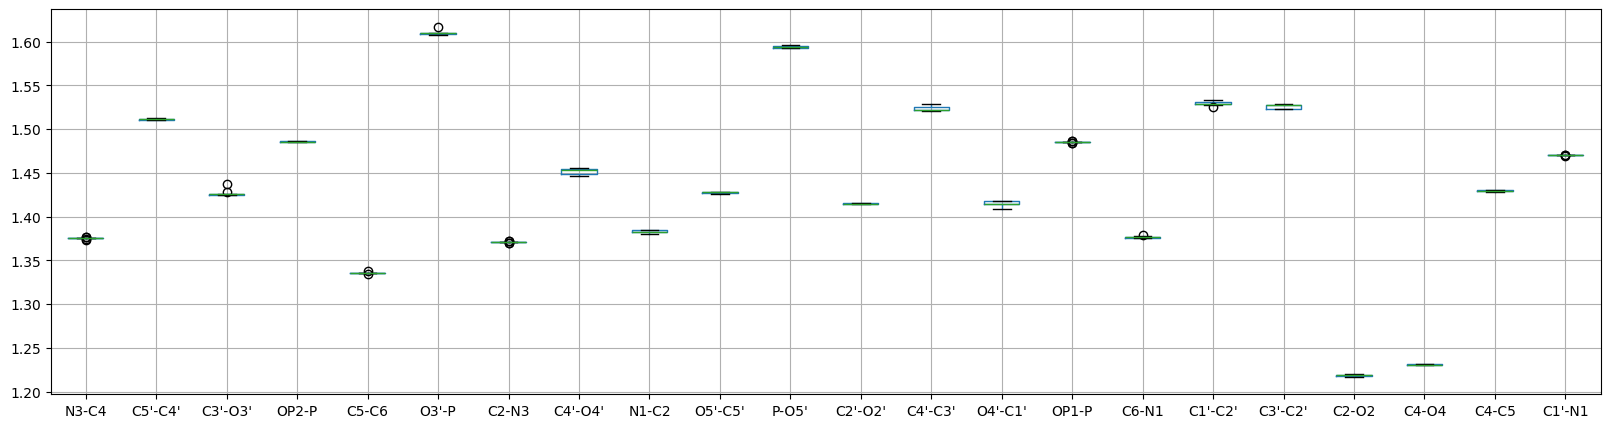

26

<Axes: >

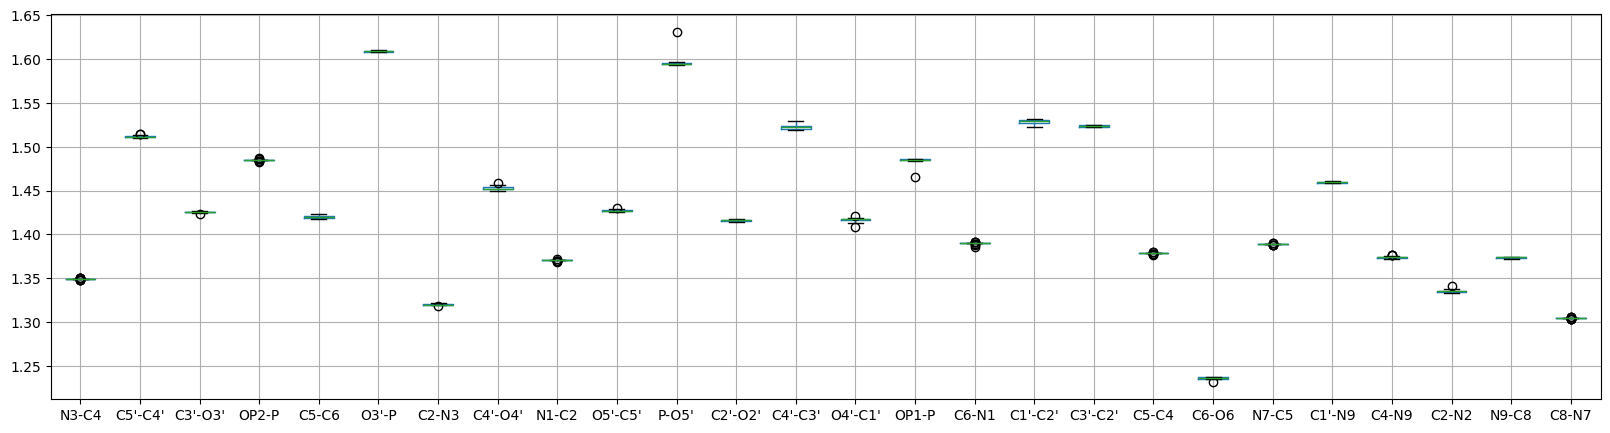

<Axes: >

<Axes: >

<Axes: >

<Axes: >

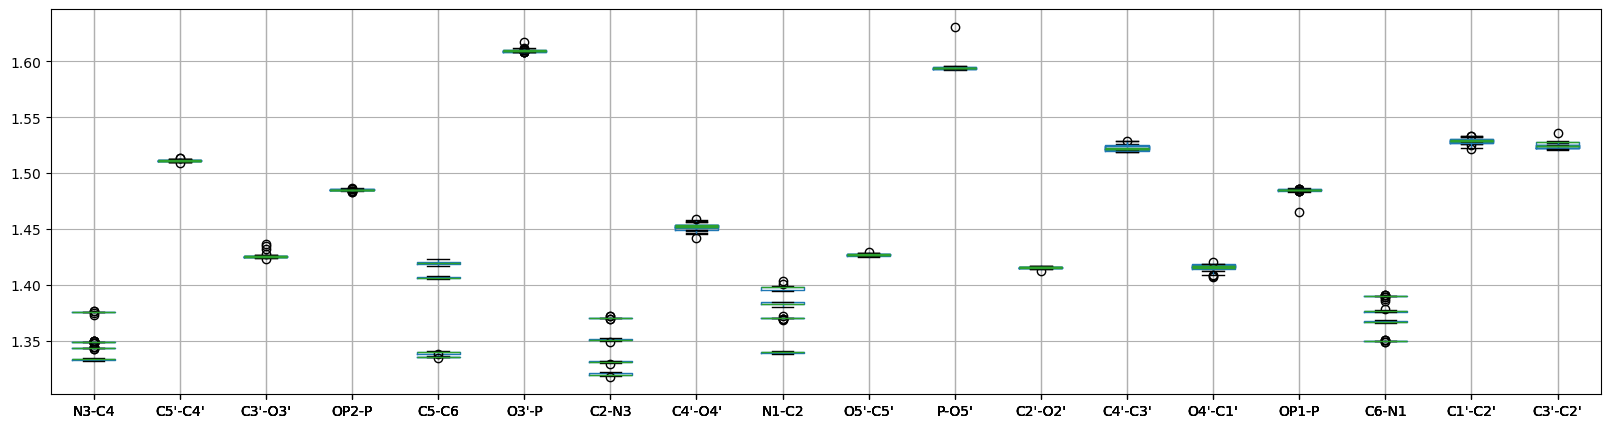

In [175]:
import matplotlib.pyplot as plt
import pandas as pd

bond = pd.read_csv("../data/rnaquadataset/preprocessing/features/1B23_1_R_1/1B23_1_R_1.bon", delimiter="\t", index_col=False)
g = bond[bond.Name == "G"][bond.columns[4:]]
a = bond[bond.Name == "A"][bond.columns[4:]]
c = bond[bond.Name == "C"][bond.columns[4:]]
u = bond[bond.Name == "U"][bond.columns[4:]]
common_columns = set(bond.columns[4:])
temp = []
for col in g.columns:
    if any(g[1:-2][col].isin(["-"])):
        temp.append(col)
gcol = list(set(bond.columns[4:]) - set(temp))
common_columns -= set(temp)
g = g[gcol]


temp = []
for col in a.columns:
    if any(a[1:-2][col].isin(["-"])):
        temp.append(col)
acol = list(set(bond.columns[4:]) - set(temp))
a = a[acol]
common_columns -= set(temp)


temp = []
for col in c.columns:
    if any(c[1:-2][col].isin(["-"])):
        temp.append(col)
ccol = list(set(bond.columns[4:]) - set(temp))
c = c[ccol]
common_columns -= set(temp)

temp = []
for col in u.columns:
    if any(u[1:-2][col].isin(["-"])):
        temp.append(col)
ucol = list(set(bond.columns[4:]) - set(temp))
u = u[ucol]
common_columns -= set(temp)

display(len(acol))
display(a.astype(float).boxplot(figsize=(20, 5), column=list(common_columns) + list(set(acol) - common_columns)))
plt.show()

display(len(ccol))
display(c.astype(float).boxplot(figsize=(20, 5), column=list(common_columns) + list(set(ccol) - common_columns)))
plt.show()

display(len(ucol))
display(u.astype(float).boxplot(figsize=(20, 5), column=list(common_columns) + list(set(ucol) - common_columns)))
plt.show()

display(len(gcol))
display(g.astype(float).boxplot(figsize=(20, 5), column=list(common_columns) + list(set(gcol) - common_columns)))
plt.show()

display(a[list(common_columns)].astype(float).boxplot(figsize=(20, 5)))
display(c[list(common_columns)].astype(float).boxplot(figsize=(20, 5)))
display(u[list(common_columns)].astype(float).boxplot(figsize=(20, 5)))
display(g[list(common_columns)].astype(float).boxplot(figsize=(20, 5)))
plt.show()

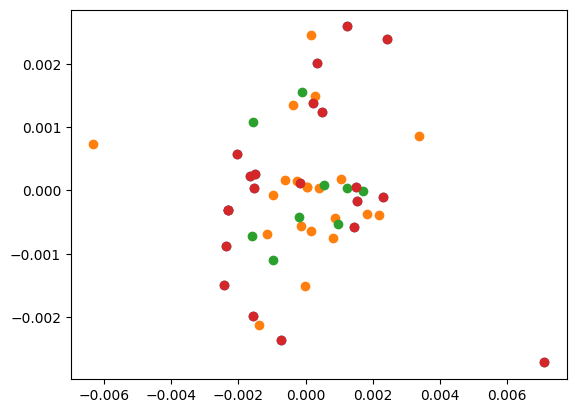

In [176]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
a_components_bond = pd.DataFrame(pca.fit_transform(a[list(set(acol) - common_columns)])).set_index(a.index)
c_components_bond = pd.DataFrame(pca.fit_transform(c[list(set(ccol) - common_columns)])).set_index(c.index)
u_components_bond = pd.DataFrame(pca.fit_transform(u[list(set(ucol) - common_columns)])).set_index(u.index)
g_components_bond = pd.DataFrame(pca.fit_transform(g[list(set(gcol) - common_columns)])).set_index(g.index)

plt.scatter(g_components_bond[0], g_components_bond[1])
plt.scatter(c_components_bond[0], c_components_bond[1])
plt.scatter(u_components_bond[0], u_components_bond[1])
plt.scatter(g_components_bond[0], g_components_bond[1])

g_bond = pd.concat([g[list(common_columns)], g_components_bond.add_suffix("_pca_bond")], axis=1)
a_bond = pd.concat([a[list(common_columns)], a_components_bond.add_suffix("_pca_bond")], axis=1)
u_bond = pd.concat([u[list(common_columns)], u_components_bond.add_suffix("_pca_bond")], axis=1)
c_bond = pd.concat([c[list(common_columns)], c_components_bond.add_suffix("_pca_bond")], axis=1)

plt.show()

# Sugar angles

In [215]:
import matplotlib.pyplot as plt
import pandas as pd

sug = pd.read_csv("../data/rnaquadataset/preprocessing/features/1B23_1_R_1/1B23_1_R_1.ang", delimiter="\t", index_col=False)
columns = [sug.columns[1]]
columns.extend(sug.columns[3:])
sug = (
    sug[columns]
    .replace("-", np.nan)
    .interpolate(method="polynomial", order=2, limit_direction="both")
    .fillna(method="ffill")
    .fillna(method="bfill")
)

/tmp/nix-shell.0h3BYt/ipykernel_123143/2333551860.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sug=sug[columns].replace('-',np.nan).interpolate(method='polynomial',order=2, limit_direction='both').fillna(method='ffill').fillna(method='bfill')
/tmp/nix-shell.0h3BYt/ipykernel_123143/2333551860.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sug=sug[columns].replace('-',np.nan).interpolate(method='polynomial',order=2, limit_direction='both').fillna(method='ffill').fillna(method='bfill')


In [217]:
g = pd.concat([g_bond, g_tor], axis=1)
c = pd.concat([c_bond, c_tor], axis=1)
a = pd.concat([a_bond, a_tor], axis=1)
u = pd.concat([u_bond, u_tor], axis=1)

In [220]:
structure = pd.concat([g, c, a, u])
structure = pd.concat([sug, structure], axis=1)

In [223]:
pd.get_dummies(structure, columns=["Name"])

,ResNum,P,OP1,OP2,O5',C5',C4',C3',O3',N3-C4,C5'-C4',C3'-O3',OP2-P,C5-C6,O3'-P,C2-N3,C4'-O4',N1-C2,O5'-C5',P-O5',C2'-O2',C4'-C3',O4'-C1',OP1-P,C6-N1,C1'-C2',C3'-C2',0_pca_bond,1_pca_bond,2_pca_bond,3_pca_bond,O4'-C1'-C2'-C3',C2'-C3'-C4'-O4',C3'-O3'-P-OP1,C3'-O3'-P-O5',O5'-C5'-C4'-C3',C3'-O3'-P-OP2,C4'-C3'-O3'-P,C6-N1-C2-N3,C3'-C4'-O4'-C1',O4'-C1'-C2'-O2',C5-C6-N1-C2,O3'-P-O5'-C5',N3-C4-C5-C6,C4-C5-C6-N1,C2-N3-C4-C5,P-O5'-C5'-C4',C4'-O4'-C1'-C2',C5'-C4'-C3'-C2',C5'-C4'-C3'-O3',C5'-C4'-O4'-C1',N1-C2-N3-C4,O5'-C5'-C4'-O4',C1'-C2'-C3'-C4',0_pca_tor,1_pca_tor,2_pca_tor,3_pca_tor,4_pca_tor,5_pca_tor,6_pca_tor,Name_A,Name_C,Name_G,Name_U
0,1,119.877,107.202,108.521,104.016,120.858,110.849,115.302,111.502,1.349,1.511,1.425,1.483,1.420,1.609,1.321,1.455,1.371,1.430,1.631,1.416,1.524,1.416,1.465,1.390,1.526,1.523,0.000346,0.002014,-0.001025,-0.000264,-31.601,-31.362,173.570,-71.989,49.335,43.083,-149.712,0.292,11.937,85.512,-0.228,-56.581,0.028,0.077,0.006,170.929,12.611,-150.955,88.416,135.837,-0.157,-68.178,37.568,514.949553,-44.629352,14.164788,-150.115025,-76.861889,-4.143565,27.325261,False,False,True,False
1,2,119.877,107.202,108.521,104.016,121.010,110.238,115.587,111.501,1.349,1.511,1.426,1.485,1.420,1.609,1.321,1.453,1.371,1.426,1.594,1.415,1.522,1.417,1.485,1.389,1.529,1.523,-0.001511,0.000268,-0.000216,-0.000637,-26.138,-35.434,173.570,-66.602,43.012,43.083,-148.866,-0.006,19.663,91.026,0.125,-56.581,0.060,-0.143,0.063,-177.470,4.275,-154.969,84.422,143.611,-0.089,-73.956,36.818,-7.632861,336.073078,-143.834979,-7.730513,156.265487,18.554487,38.367513,False,False,True,False
2,3,119.756,107.254,108.536,103.972,120.967,110.270,115.748,111.884,1.334,1.512,1.426,1.485,1.339,1.608,1.350,1.453,1.397,1.427,1.593,1.415,1.521,1.419,1.485,1.367,1.529,1.524,-0.000017,-0.001516,0.000174,-0.000999,-25.664,-36.904,178.946,-70.658,36.785,48.474,-157.212,0.447,21.465,91.710,-0.288,-60.266,0.197,-0.027,-0.039,-175.710,2.848,-156.508,82.829,145.491,-0.280,-79.950,37.463,-14.716515,-210.744531,-46.315493,65.904384,-19.175805,4.615192,0.170429,False,True,False,False
3,4,119.755,107.340,108.424,104.076,121.068,110.349,115.909,112.004,1.348,1.512,1.426,1.485,1.422,1.610,1.319,1.451,1.371,1.427,1.594,1.414,1.520,1.418,1.486,1.391,1.532,1.524,-0.002298,-0.000313,0.001046,0.000433,-20.725,-39.987,174.777,-67.059,88.413,44.298,-149.820,0.020,27.863,96.555,0.055,-84.799,-0.144,0.000,0.208,158.156,-4.360,-159.897,79.481,151.898,-0.140,-27.728,36.481,-328.465707,111.115515,42.126442,40.299055,-102.616821,42.465574,9.744101,False,False,True,False
4,5,119.764,107.161,108.471,104.107,120.907,110.332,116.391,112.504,1.332,1.512,1.426,1.485,1.341,1.611,1.351,1.451,1.395,1.426,1.593,1.416,1.521,1.419,1.486,1.368,1.531,1.523,-0.000981,-0.000065,0.000622,0.001184,-21.772,-40.844,178.429,-86.063,61.798,48.040,-155.630,0.244,28.108,95.356,0.012,-72.834,0.379,-0.308,-0.134,176.133,-3.870,-160.648,78.747,152.501,-0.176,-54.266,37.651,200.194591,72.256462,-34.343097,7.001017,-12.709300,-8.346305,0.105158,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,62,119.781,107.392,108.177,104.068,120.938,110.278,115.494,111.193,1.334,1.511,1.426,1.486,1.340,1.608,1.351,1.448,1.398,1.427,1.593,1.415,1.521,1.415,1.485,1.367,1.532,1.528,0.001826,-0.000374,0.000978,-0.000193,-16.000,-36.332,170.161,88.505,55.220,39.945,-149.360,0.145,27.213,101.251,0.112,-55.285,-0.003,-0.179,0.258,166.502,-6.925,-155.839,83.857,150.924,-0.324,-61.281,31.412,-244.951515,-84.598221,-98.833559,-172.615840,5.320695,-3.916909,0.045348,False,True,False,False
62,63,119.868,107.658,108.037,103.895,121.138,110.199,114.804,113.641,1.375,1.511,1.437,1.486,1.336,1.617,1.371,1.453,1.385,1.428,1.593,1.414,1.528,1.414,1.485,1.377,1.528,1.528,0.001241,0.000046,-0.000940,0.0006

In [ ]:
import pandas as pd

# import matplotlib.pyplot as plt

bond = pd.read_csv(
    "/data/1/projects/rnaquanet/data/dfs2/preprocessing/features/1A4D_1_A_B_A_70_C_1a4d_S_000255_minimize_003/1A4D_1_A_B_A_70_C_1a4d_S_000255_minimize_003.aag",
    delimiter="\t",
    index_col=False,
)
g = bond[bond.Name == "G"][bond.columns[4:]]
a = bond[bond.Name == "A"][bond.columns[4:]]
c = bond[bond.Name == "C"][bond.columns[4:]]
u = bond[bond.Name == "U"][bond.columns[4:]]
common_columns = set(bond.columns[4:])
temp = []
for col in g.columns:
    if any(g[1:-2][col].isin(["-"])):
        temp.append(col)
gcol = list(set(bond.columns[4:]) - set(temp))
common_columns -= set(temp)
g = g[gcol]


temp = []
for col in a.columns:
    if any(a[1:-2][col].isin(["-"])):
        temp.append(col)
acol = list(set(bond.columns[4:]) - set(temp))
a = a[acol]
common_columns -= set(temp)


temp = []
for col in c.columns:
    if any(c[1:-2][col].isin(["-"])):
        temp.append(col)
ccol = list(set(bond.columns[4:]) - set(temp))
c = c[ccol]
common_columns -= set(temp)

temp = []
for col in u.columns:
    if any(u[1:-2][col].isin(["-"])):
        temp.append(col)
ucol = list(set(bond.columns[4:]) - set(temp))
u = u[ucol]
common_columns -= set(temp)

display(len(acol))
display(len(common_columns))
# display(
#     a.astype(float).boxplot(
#         figsize=(20, 5), column=list(common_columns) + list(set(acol) - common_columns)
#     )
# )
# plt.show()

display(len(ccol))
# display(
#     c.astype(float).boxplot(
#         figsize=(20, 5), column=list(common_columns) + list(set(ccol) - common_columns)
#     )
# )
# plt.show()

display(len(ucol))
# display(
#     u.astype(float).boxplot(
#         figsize=(20, 5), column=list(common_columns) + list(set(ucol) - common_columns)
#     )
# )
# plt.show()

display(len(gcol))
# display(
#     g.astype(float).boxplot(
#         figsize=(20, 5), column=list(common_columns) + list(set(gcol) - common_columns)
#     )
# )
# plt.show()

# display(a[list(common_columns)].astype(float).boxplot(figsize=(20, 5)))
# display(c[list(common_columns)].astype(float).boxplot(figsize=(20, 5)))
# display(u[list(common_columns)].astype(float).boxplot(figsize=(20, 5)))
# display(g[list(common_columns)].astype(float).boxplot(figsize=(20, 5)))
# plt.show()

28

38

38

25

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
a_components_bond = pd.DataFrame(pca.fit_transform(a[list(set(acol) - common_columns)])).set_index(a.index)
c_components_bond = pd.DataFrame(pca.fit_transform(c[list(set(ccol) - common_columns)])).set_index(c.index)
u_components_bond = pd.DataFrame(pca.fit_transform(u[list(set(ucol) - common_columns)])).set_index(u.index)
g_components_bond = pd.DataFrame(pca.fit_transform(g[list(set(gcol) - common_columns)])).set_index(g.index)

plt.scatter(g_components_bond[0], g_components_bond[1])
plt.scatter(c_components_bond[0], c_components_bond[1])
plt.scatter(u_components_bond[0], u_components_bond[1])
plt.scatter(g_components_bond[0], g_components_bond[1])

g_bond = pd.concat([g[list(common_columns)], g_components_bond.add_suffix("_pca_bond")], axis=1)
a_bond = pd.concat([a[list(common_columns)], a_components_bond.add_suffix("_pca_bond")], axis=1)
u_bond = pd.concat([u[list(common_columns)], u_components_bond.add_suffix("_pca_bond")], axis=1)
c_bond = pd.concat([c[list(common_columns)], c_components_bond.add_suffix("_pca_bond")], axis=1)

plt.show()